In [4]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.tsmyo_DLLT_strategy import (
    TSMyoDLLTStrategy,
)
from datetime import datetime

In [12]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IF9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.25/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine.add_strategy(TSMyoDLLTStrategy, {'LLT_len_slow':20, 'LLT_len_fast':15, 'fit_bar':5, 'trailing_stop':3, 'fixed_size':1})

2020-02-24 22:17:08.214840	开始加载历史数据
2020-02-24 22:17:08.214840	加载进度： [1%]
2020-02-24 22:17:08.214840	加载进度： [2%]
2020-02-24 22:17:08.214840	加载进度： [2%]
2020-02-24 22:17:08.214840	加载进度： [3%]
2020-02-24 22:17:08.214840	加载进度： [4%]
2020-02-24 22:17:08.214840	加载进度： [5%]
2020-02-24 22:17:08.214840	加载进度： [6%]
2020-02-24 22:17:08.214840	加载进度： [7%]
2020-02-24 22:17:08.214840	加载进度： [7%]
2020-02-24 22:17:08.215840	加载进度： [8%]
2020-02-24 22:17:08.215840	加载进度： [9%]
2020-02-24 22:17:08.215840	加载进度： [10%]
2020-02-24 22:17:08.215840	加载进度：# [11%]
2020-02-24 22:17:08.215840	加载进度：# [12%]
2020-02-24 22:17:08.215840	加载进度：# [12%]
2020-02-24 22:17:08.216841	加载进度：# [13%]
2020-02-24 22:17:08.216841	加载进度：# [14%]
2020-02-24 22:17:08.216841	加载进度：# [15%]
2020-02-24 22:17:08.216841	加载进度：# [16%]
2020-02-24 22:17:08.216841	加载进度：# [16%]
2020-02-24 22:17:08.216841	加载进度：# [17%]
2020-02-24 22:17:08.216841	加载进度：# [18%]
2020-02-24 22:17:08.217843	加载进度：# [19%]
2020-02-24 22:17:08.217843	加载进度：# [20%]
2020-02-24 22:17:08.217843	

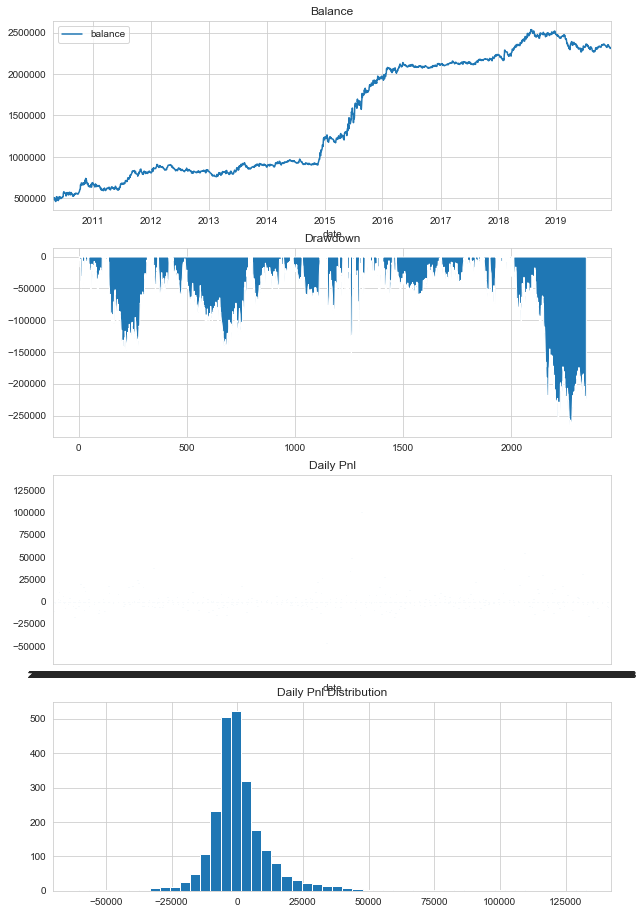

In [13]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [11]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("LLT_len_fast", 5, 30, 5) # 4
setting.add_parameter("LLT_len_slow", 10, 60, 10) # 0.55
setting.add_parameter("fit_bar", 5, 15, 5) # 44
#setting.add_parameter("atr_ma_len", 20, 40, 2) # 22

engine.run_optimization(setting)

2020-02-24 22:16:22.322486	参数：{'LLT_len_fast': 15, 'LLT_len_slow': 20, 'fit_bar': 5}, 目标：0.9873522447610417
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 10, 'LLT_len_slow': 50, 'fit_bar': 10}, 目标：0.9779492561297248
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 50, 'fit_bar': 10}, 目标：0.8600805200444239
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 15, 'LLT_len_slow': 40, 'fit_bar': 5}, 目标：0.8274980287181172
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 10, 'LLT_len_slow': 20, 'fit_bar': 5}, 目标：0.7887109348078919
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 15, 'LLT_len_slow': 30, 'fit_bar': 5}, 目标：0.7673498948527708
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 40, 'fit_bar': 10}, 目标：0.7367818023333913
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 20, 'fit_bar': 10}, 目标：0.6642559754705202
2020-02-24 22:16:22.323500	参数：{'LLT_len_fast': 10, 'LLT_len_slow': 40, 'fit_bar': 5}, 目标：0.6580012611404775
2020-02-24 22:16:22.323500	

[("{'LLT_len_fast': 15, 'LLT_len_slow': 20, 'fit_bar': 5}",
  0.9873522447610417,
  {'start_date': datetime.date(2010, 4, 26),
   'end_date': datetime.date(2019, 12, 13),
   'total_days': 2345,
   'profit_days': 1011,
   'loss_days': 1320,
   'capital': 500000,
   'end_balance': 2530959.096500003,
   'max_drawdown': -224832.24299999885,
   'max_ddpercent': -17.674909999218677,
   'max_drawdown_duration': 168,
   'total_net_pnl': 2030959.096500001,
   'daily_net_pnl': 866.0806381663117,
   'total_commission': 172480.90350000001,
   'daily_commission': 73.55262409381663,
   'total_slippage': 445380.0,
   'daily_slippage': 189.92750533049042,
   'total_turnover': 6899236140.0,
   'daily_turnover': 2942104.963752665,
   'total_trade_count': 7423,
   'daily_trade_count': 3.16545842217484,
   'total_return': 406.1918193000006,
   'annual_return': 41.571870631983,
   'daily_return': 0.06996046283667551,
   'return_std': 1.097706351090471,
   'sharpe_ratio': 0.9873522447610417,
   'return_draw

2020-02-24 22:46:40.513473	开始加载历史数据
2020-02-24 22:46:40.513473	加载进度： [1%]
2020-02-24 22:46:40.513473	加载进度： [2%]
2020-02-24 22:46:40.513473	加载进度： [2%]
2020-02-24 22:46:40.513473	加载进度： [3%]
2020-02-24 22:46:40.513473	加载进度： [4%]
2020-02-24 22:46:40.514474	加载进度： [5%]
2020-02-24 22:46:40.514474	加载进度： [6%]
2020-02-24 22:46:40.514474	加载进度： [7%]
2020-02-24 22:46:40.514474	加载进度： [7%]
2020-02-24 22:46:40.514474	加载进度： [8%]
2020-02-24 22:46:40.514474	加载进度： [9%]
2020-02-24 22:46:40.514474	加载进度： [10%]
2020-02-24 22:46:40.514474	加载进度：# [11%]
2020-02-24 22:46:40.514474	加载进度：# [12%]
2020-02-24 22:46:40.514474	加载进度：# [12%]
2020-02-24 22:46:40.514474	加载进度：# [13%]
2020-02-24 22:46:40.514474	加载进度：# [14%]
2020-02-24 22:46:40.514474	加载进度：# [15%]
2020-02-24 22:46:40.514474	加载进度：# [16%]
2020-02-24 22:46:40.514474	加载进度：# [16%]
2020-02-24 22:46:40.514474	加载进度：# [17%]
2020-02-24 22:46:40.514474	加载进度：# [18%]
2020-02-24 22:46:40.514474	加载进度：# [19%]
2020-02-24 22:46:40.514474	加载进度：# [20%]
2020-02-24 22:46:40.514474	

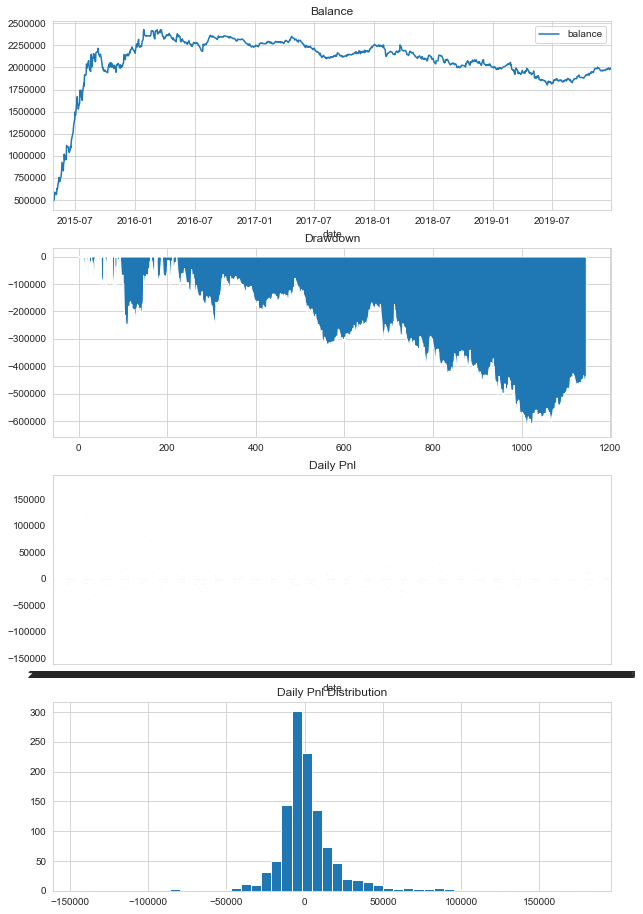

In [17]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2010, 1, 1),
    end=datetime(2020, 1, 1),
    rate=0.25/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine.add_strategy(TSMyoDLLTStrategy, {'LLT_len_slow':10, 'LLT_len_fast':5, 'fit_bar':10, 'trailing_stop':3, 'fixed_size':1})
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [16]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("LLT_len_fast", 5, 30, 5) # 4
setting.add_parameter("LLT_len_slow", 10, 60, 10) # 0.55
setting.add_parameter("fit_bar", 5, 15, 5) # 44
#setting.add_parameter("atr_ma_len", 20, 40, 2) # 22

engine.run_optimization(setting)

2020-02-24 22:45:01.156709	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 10, 'fit_bar': 10}, 目标：1.3606533335158117
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 10, 'LLT_len_slow': 60, 'fit_bar': 15}, 目标：1.2761269647874622
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 20, 'LLT_len_slow': 40, 'fit_bar': 5}, 目标：1.0864882866797685
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 10, 'LLT_len_slow': 20, 'fit_bar': 5}, 目标：0.9947475930558234
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 10, 'fit_bar': 5}, 目标：0.9811119474019366
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 25, 'LLT_len_slow': 30, 'fit_bar': 5}, 目标：0.9510506246341496
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 20, 'fit_bar': 5}, 目标：0.8690125481371879
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 40, 'fit_bar': 10}, 目标：0.8285062767635438
2020-02-24 22:45:01.157711	参数：{'LLT_len_fast': 5, 'LLT_len_slow': 60, 'fit_bar': 15}, 目标：0.7981737341515321
2020-02-24 22:45:01.157711	参数

[("{'LLT_len_fast': 5, 'LLT_len_slow': 10, 'fit_bar': 10}",
  1.3606533335158117,
  {'start_date': datetime.date(2015, 4, 24),
   'end_date': datetime.date(2019, 12, 31),
   'total_days': 1146,
   'profit_days': 477,
   'loss_days': 665,
   'capital': 500000,
   'end_balance': 2033957.218000004,
   'max_drawdown': -478625.1870000011,
   'max_ddpercent': -20.635849619485153,
   'max_drawdown_duration': 1197,
   'total_net_pnl': 1533957.218000005,
   'daily_net_pnl': 1338.531603839446,
   'total_commission': 124522.782,
   'daily_commission': 108.65862303664922,
   'total_slippage': 164640.0,
   'daily_slippage': 143.66492146596858,
   'total_turnover': 4980911280.0,
   'daily_turnover': 4346344.921465969,
   'total_trade_count': 4116,
   'daily_trade_count': 3.5916230366492146,
   'total_return': 306.79144360000083,
   'annual_return': 64.24951698429336,
   'daily_return': 0.12581850443545228,
   'return_std': 1.4325264498168904,
   'sharpe_ratio': 1.3606533335158117,
   'return_drawdow

2019-12-20 12:07:19.381702	开始加载历史数据
2019-12-20 12:07:19.641336	加载进度： [9%]
2019-12-20 12:07:19.858341	加载进度：# [17%]
2019-12-20 12:07:20.105831	加载进度：## [26%]
2019-12-20 12:07:20.381099	加载进度：### [34%]
2019-12-20 12:07:20.640501	加载进度：#### [43%]
2019-12-20 12:07:20.888839	加载进度：##### [52%]
2019-12-20 12:07:21.177471	加载进度：###### [60%]
2019-12-20 12:07:21.467733	加载进度：###### [69%]
2019-12-20 12:07:21.735977	加载进度：####### [78%]
2019-12-20 12:07:22.266116	加载进度：######## [86%]
2019-12-20 12:07:22.548527	加载进度：######### [95%]
2019-12-20 12:07:22.708051	加载进度：########## [100%]
2019-12-20 12:07:22.708051	历史数据加载完成，数据量：55680
2019-12-20 12:07:22.739304	策略初始化完成
2019-12-20 12:07:22.739304	开始回放历史数据
2019-12-20 12:07:24.842473	历史数据回放结束
2019-12-20 12:07:24.842473	开始计算逐日盯市盈亏
2019-12-20 12:07:24.842473	逐日盯市盈亏计算完成
2019-12-20 12:07:24.842473	开始计算策略统计指标
2019-12-20 12:07:24.842473	------------------------------
2019-12-20 12:07:24.842473	首个交易日：	2019-01-09
2019-12-20 12:07:24.842473	最后交易日：	2019-12-13
2019-12-20 12:07:24.

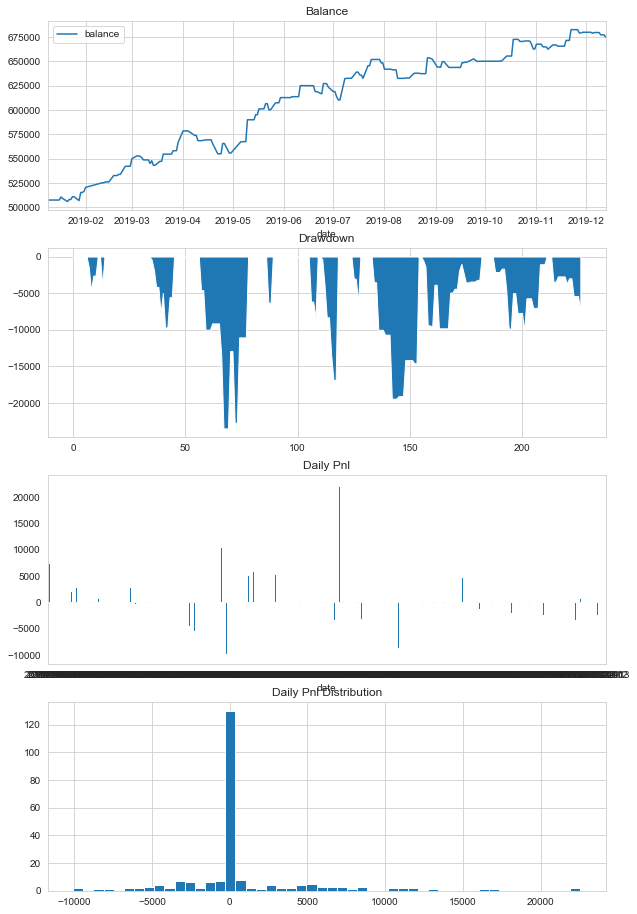

In [4]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2019, 1, 1),
    end=datetime(2019, 12, 15),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:10:23.916291	开始加载历史数据
2019-12-20 12:10:23.931920	加载进度： [8%]
2019-12-20 12:10:23.931920	加载进度：# [16%]
2019-12-20 12:10:23.931920	加载进度：## [25%]
2019-12-20 12:10:23.931920	加载进度：### [33%]
2019-12-20 12:10:23.931920	加载进度：#### [41%]
2019-12-20 12:10:23.931920	加载进度：#### [49%]
2019-12-20 12:10:23.931920	加载进度：##### [58%]
2019-12-20 12:10:23.931920	加载进度：###### [66%]
2019-12-20 12:10:23.931920	加载进度：####### [74%]
2019-12-20 12:10:23.931920	加载进度：######## [82%]
2019-12-20 12:10:23.931920	加载进度：######### [90%]
2019-12-20 12:10:23.931920	加载进度：######### [99%]
2019-12-20 12:10:23.931920	加载进度：########## [100%]
2019-12-20 12:10:23.931920	历史数据加载完成，数据量：58320
2019-12-20 12:10:23.954574	策略初始化完成
2019-12-20 12:10:23.954574	开始回放历史数据
2019-12-20 12:10:26.725533	历史数据回放结束
2019-12-20 12:10:26.725533	开始计算逐日盯市盈亏
2019-12-20 12:10:26.729537	逐日盯市盈亏计算完成
2019-12-20 12:10:26.730538	开始计算策略统计指标
2019-12-20 12:10:26.735542	------------------------------
2019-12-20 12:10:26.736543	首个交易日：	2018-01-09
2019-12-20 12:10:26

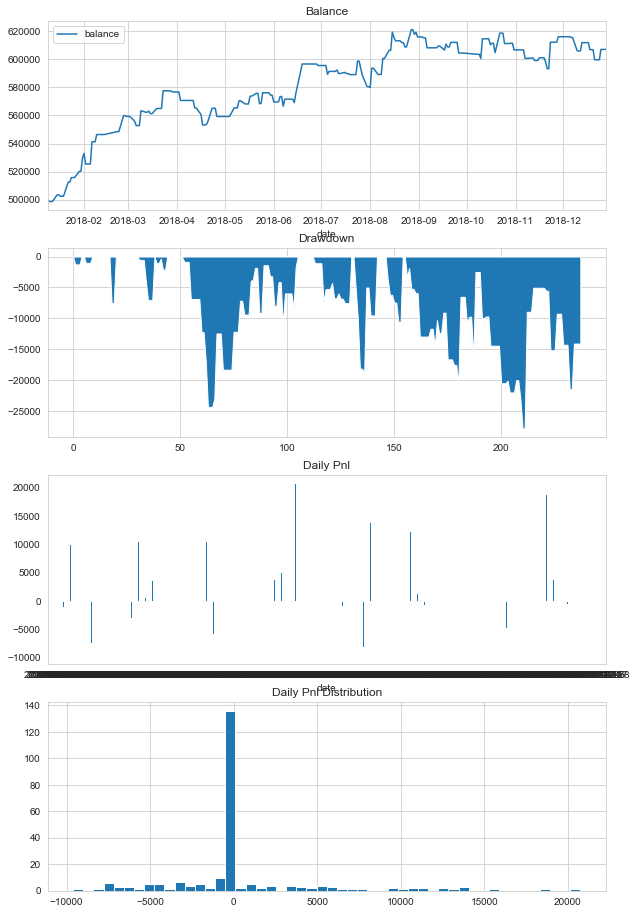

In [13]:
# 样本内每年 2018-19
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2018, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:10:09.769725	开始加载历史数据
2019-12-20 12:10:09.769725	加载进度： [8%]
2019-12-20 12:10:09.769725	加载进度：# [16%]
2019-12-20 12:10:09.769725	加载进度：## [25%]
2019-12-20 12:10:09.769725	加载进度：### [33%]
2019-12-20 12:10:09.769725	加载进度：#### [41%]
2019-12-20 12:10:09.769725	加载进度：#### [49%]
2019-12-20 12:10:09.769725	加载进度：##### [58%]
2019-12-20 12:10:09.769725	加载进度：###### [66%]
2019-12-20 12:10:09.769725	加载进度：####### [74%]
2019-12-20 12:10:09.769725	加载进度：######## [82%]
2019-12-20 12:10:09.769725	加载进度：######### [90%]
2019-12-20 12:10:09.769725	加载进度：######### [99%]
2019-12-20 12:10:09.769725	加载进度：########## [100%]
2019-12-20 12:10:09.769725	历史数据加载完成，数据量：58560
2019-12-20 12:10:09.804533	策略初始化完成
2019-12-20 12:10:09.804533	开始回放历史数据
2019-12-20 12:10:12.009985	历史数据回放结束
2019-12-20 12:10:12.010985	开始计算逐日盯市盈亏
2019-12-20 12:10:12.014989	逐日盯市盈亏计算完成
2019-12-20 12:10:12.014989	开始计算策略统计指标
2019-12-20 12:10:12.020522	------------------------------
2019-12-20 12:10:12.020522	首个交易日：	2017-01-10
2019-12-20 12:10:12

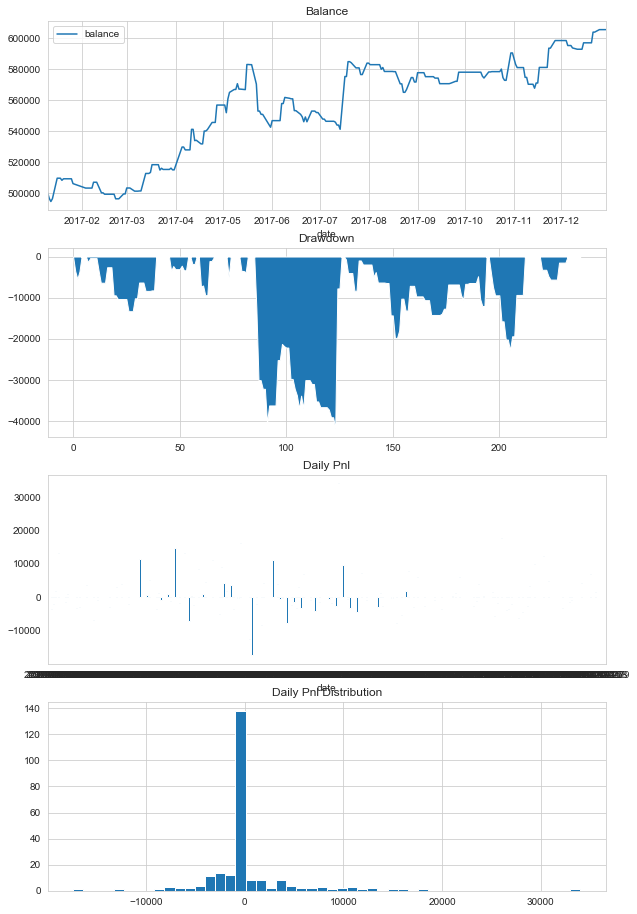

In [12]:
# 样本内每年 2017-18
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2017, 1, 1),
    end=datetime(2018, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:09:58.530770	开始加载历史数据
2019-12-20 12:09:58.530770	加载进度： [8%]
2019-12-20 12:09:58.530770	加载进度：# [16%]
2019-12-20 12:09:58.531771	加载进度：## [25%]
2019-12-20 12:09:58.531771	加载进度：### [33%]
2019-12-20 12:09:58.531771	加载进度：#### [41%]
2019-12-20 12:09:58.531771	加载进度：#### [49%]
2019-12-20 12:09:58.531771	加载进度：##### [57%]
2019-12-20 12:09:58.531771	加载进度：###### [66%]
2019-12-20 12:09:58.531771	加载进度：####### [74%]
2019-12-20 12:09:58.531771	加载进度：######## [82%]
2019-12-20 12:09:58.532773	加载进度：######### [90%]
2019-12-20 12:09:58.532773	加载进度：######### [98%]
2019-12-20 12:09:58.532773	加载进度：########## [100%]
2019-12-20 12:09:58.532773	历史数据加载完成，数据量：58560
2019-12-20 12:09:58.564276	策略初始化完成
2019-12-20 12:09:58.564276	开始回放历史数据
2019-12-20 12:10:00.743643	历史数据回放结束
2019-12-20 12:10:00.744644	开始计算逐日盯市盈亏
2019-12-20 12:10:00.748691	逐日盯市盈亏计算完成
2019-12-20 12:10:00.748691	开始计算策略统计指标
2019-12-20 12:10:00.755894	------------------------------
2019-12-20 12:10:00.755894	首个交易日：	2016-01-11
2019-12-20 12:10:00

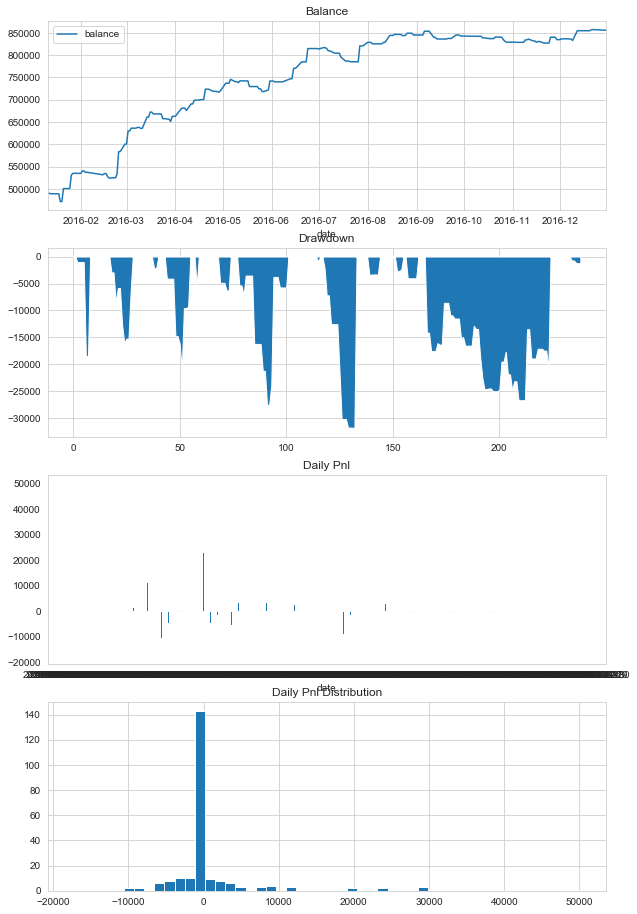

In [11]:
# 样本内每年 2016-17
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2016, 1, 1),
    end=datetime(2017, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-20 12:09:46.444700	开始加载历史数据
2019-12-20 12:09:46.444700	加载进度： [8%]
2019-12-20 12:09:46.444700	加载进度：# [16%]
2019-12-20 12:09:46.444700	加载进度：## [25%]
2019-12-20 12:09:46.444700	加载进度：### [33%]
2019-12-20 12:09:46.444700	加载进度：#### [41%]
2019-12-20 12:09:46.444700	加载进度：#### [49%]
2019-12-20 12:09:46.444700	加载进度：##### [58%]
2019-12-20 12:09:46.444700	加载进度：###### [66%]
2019-12-20 12:09:46.444700	加载进度：####### [74%]
2019-12-20 12:09:46.444700	加载进度：######## [82%]
2019-12-20 12:09:46.444700	加载进度：######### [90%]
2019-12-20 12:09:46.445701	加载进度：######### [99%]
2019-12-20 12:09:46.445701	加载进度：########## [100%]
2019-12-20 12:09:46.445701	历史数据加载完成，数据量：47520
2019-12-20 12:09:46.481240	策略初始化完成
2019-12-20 12:09:46.482241	开始回放历史数据
2019-12-20 12:09:48.210081	历史数据回放结束
2019-12-20 12:09:48.210081	开始计算逐日盯市盈亏
2019-12-20 12:09:48.225709	逐日盯市盈亏计算完成
2019-12-20 12:09:48.225709	开始计算策略统计指标
2019-12-20 12:09:48.225709	------------------------------
2019-12-20 12:09:48.225709	首个交易日：	2015-04-24
2019-12-20 12:09:48

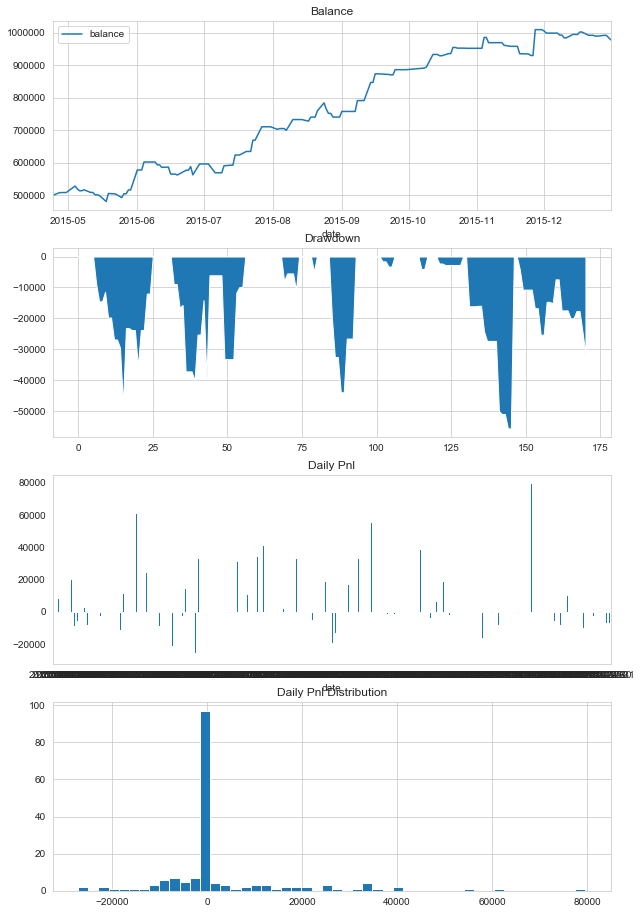

In [10]:
# 样本内每年 2015-16
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IC9999.CFFEX",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2016, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=200,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 35, 'atr_ma_len': 20, 'trailing_stop':0.6})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

2019-12-16 14:56:11.167765	开始加载历史数据
2019-12-16 14:56:11.167765	加载进度： [2%]
2019-12-16 14:56:11.167765	加载进度： [3%]
2019-12-16 14:56:11.167765	加载进度： [5%]
2019-12-16 14:56:11.167765	加载进度： [7%]
2019-12-16 14:56:11.167765	加载进度： [8%]
2019-12-16 14:56:11.167765	加载进度： [10%]
2019-12-16 14:56:11.167765	加载进度：# [12%]
2019-12-16 14:56:11.167765	加载进度：# [13%]
2019-12-16 14:56:11.167765	加载进度：# [15%]
2019-12-16 14:56:11.167765	加载进度：# [16%]
2019-12-16 14:56:11.167765	加载进度：# [18%]
2019-12-16 14:56:11.167765	加载进度：# [20%]
2019-12-16 14:56:11.167765	加载进度：## [21%]
2019-12-16 14:56:11.167765	加载进度：## [23%]
2019-12-16 14:56:11.167765	加载进度：## [25%]
2019-12-16 14:56:11.167765	加载进度：## [26%]
2019-12-16 14:56:11.167765	加载进度：## [28%]
2019-12-16 14:56:11.167765	加载进度：## [30%]
2019-12-16 14:56:11.167765	加载进度：### [31%]
2019-12-16 14:56:11.167765	加载进度：### [33%]
2019-12-16 14:56:11.167765	加载进度：### [35%]
2019-12-16 14:56:11.167765	加载进度：### [36%]
2019-12-16 14:56:11.167765	加载进度：### [38%]
2019-12-16 14:56:11.167765	加载进度：### [39

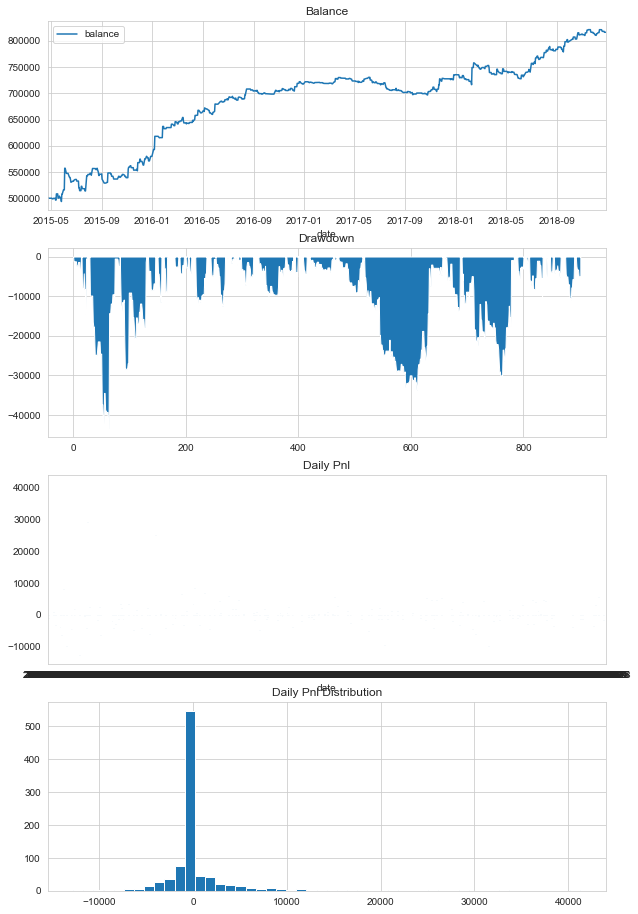

In [4]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 44, 'atr_ma_len': 22, 'trailing_short':0.55,'trailing_long':0.55})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()

In [6]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
#setting.add_parameter("atr_stop", 3, 6, 0.5) # 4
#setting.add_parameter("trailing_short", 0.3, 0.6, 0.05) # 0.4
#setting.add_parameter("trailing_long", 0.3, 0.6, 0.05) # 0.4
setting.add_parameter("atr_window", 20, 60, 4) # 44
setting.add_parameter("atr_ma_len", 16, 40, 2) # 22

engine2.run_optimization(setting)

2019-12-16 15:00:14.392390	参数：{'atr_window': 24, 'atr_ma_len': 16}, 目标：1.4352150721685117
2019-12-16 15:00:14.392390	参数：{'atr_window': 28, 'atr_ma_len': 32}, 目标：1.434102184137379
2019-12-16 15:00:14.392390	参数：{'atr_window': 28, 'atr_ma_len': 34}, 目标：1.4139702801845824
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 40}, 目标：1.3971258848660566
2019-12-16 15:00:14.392390	参数：{'atr_window': 56, 'atr_ma_len': 38}, 目标：1.3905074505785386
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 38}, 目标：1.3702499365892344
2019-12-16 15:00:14.392390	参数：{'atr_window': 48, 'atr_ma_len': 40}, 目标：1.364750902491683
2019-12-16 15:00:14.392390	参数：{'atr_window': 24, 'atr_ma_len': 38}, 目标：1.3628886023841191
2019-12-16 15:00:14.392390	参数：{'atr_window': 52, 'atr_ma_len': 38}, 目标：1.3581196744008468
2019-12-16 15:00:14.392390	参数：{'atr_window': 60, 'atr_ma_len': 36}, 目标：1.3581051774668824
2019-12-16 15:00:14.392390	参数：{'atr_window': 20, 'atr_ma_len': 18}, 目标：1.354321748458312
2019-12-16 15

[("{'atr_window': 24, 'atr_ma_len': 16}",
  1.4352150721685117,
  {'start_date': datetime.date(2015, 4, 24),
   'end_date': datetime.date(2018, 12, 28),
   'total_days': 902,
   'profit_days': 202,
   'loss_days': 207,
   'capital': 500000,
   'end_balance': 777849.7363999975,
   'max_drawdown': -43131.77880000061,
   'max_ddpercent': -7.692050223861405,
   'max_drawdown_duration': 95,
   'total_net_pnl': 277849.73639999767,
   'daily_net_pnl': 308.0374017738333,
   'total_commission': 32230.2636,
   'daily_commission': 35.73199955654102,
   'total_slippage': 85920.0,
   'daily_slippage': 95.2549889135255,
   'total_turnover': 1074342120.0,
   'daily_turnover': 1191066.6518847006,
   'total_trade_count': 1432,
   'daily_trade_count': 1.5875831485587584,
   'total_return': 55.56994727999949,
   'annual_return': 14.785795285143989,
   'daily_return': 0.04854140921686434,
   'return_std': 0.5239634759807799,
   'sharpe_ratio': 1.4352150721685117,
   'return_drawdown_ratio': 7.224334951378

2019-12-16 19:56:03.517048	开始加载历史数据
2019-12-16 19:56:03.517048	加载进度： [2%]
2019-12-16 19:56:03.517048	加载进度： [3%]
2019-12-16 19:56:03.517048	加载进度： [5%]
2019-12-16 19:56:03.518049	加载进度： [7%]
2019-12-16 19:56:03.518049	加载进度： [8%]
2019-12-16 19:56:03.518049	加载进度： [10%]
2019-12-16 19:56:03.518049	加载进度：# [12%]
2019-12-16 19:56:03.518049	加载进度：# [13%]
2019-12-16 19:56:03.518049	加载进度：# [15%]
2019-12-16 19:56:03.518049	加载进度：# [16%]
2019-12-16 19:56:03.518049	加载进度：# [18%]
2019-12-16 19:56:03.518049	加载进度：# [20%]
2019-12-16 19:56:03.518049	加载进度：## [21%]
2019-12-16 19:56:03.518049	加载进度：## [23%]
2019-12-16 19:56:03.518049	加载进度：## [25%]
2019-12-16 19:56:03.518049	加载进度：## [26%]
2019-12-16 19:56:03.518049	加载进度：## [28%]
2019-12-16 19:56:03.518049	加载进度：## [30%]
2019-12-16 19:56:03.518049	加载进度：### [31%]
2019-12-16 19:56:03.518049	加载进度：### [33%]
2019-12-16 19:56:03.518049	加载进度：### [35%]
2019-12-16 19:56:03.518049	加载进度：### [36%]
2019-12-16 19:56:03.518049	加载进度：### [38%]
2019-12-16 19:56:03.518049	加载进度：### [39

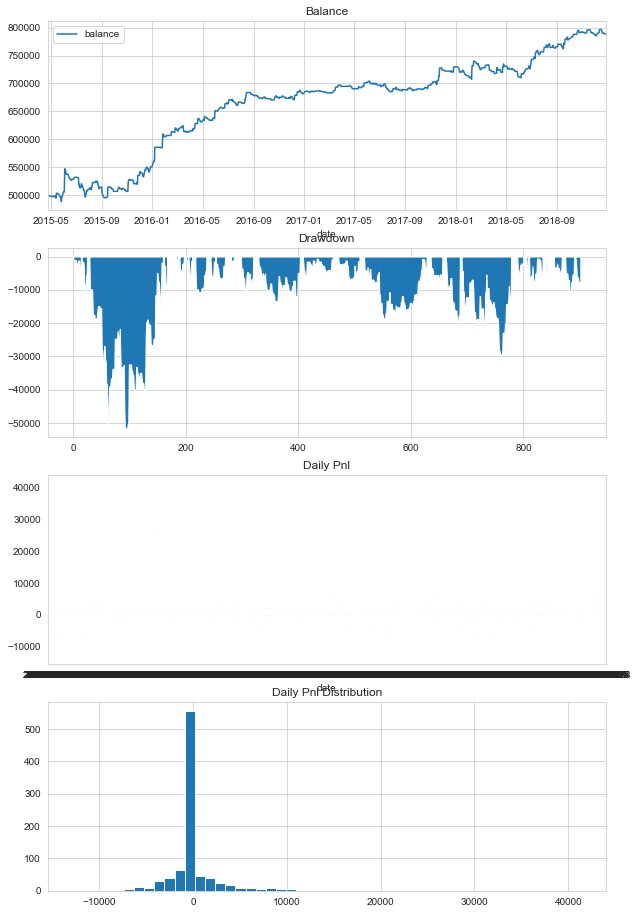

In [7]:
# 样本外。2019
engine2 = BacktestingEngine()
engine2.set_parameters(
    vt_symbol="IH9999.CFFEX",
    interval="1m",
    start=datetime(2014, 1, 1),
    end=datetime(2019, 1, 1),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=500_000,
)
engine2.load_data()
engine2.add_strategy(TSMyoRBKStrategy,{'limited_size':8,'atr_stop': 4, 'atr_window': 24, 'atr_ma_len': 16, 'trailing_short':0.55,'trailing_long':0.55})
engine2.run_backtesting()
df2 = engine2.calculate_result()
engine2.calculate_statistics()
engine2.show_chart()